In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [60]:
yolo = cv2.dnn.readNet("/content/yolov3-tiny.weights", "/content/yolov3-tiny.cfg")

In [61]:
classes = []

with open("/content/coco.names", 'r') as f:
  classes = f.read().splitlines()

In [62]:
len(classes)

80

In [63]:
img = cv2.imread("/content/car2.jpeg")
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0, 0, 0), swapRB=True, crop=False)


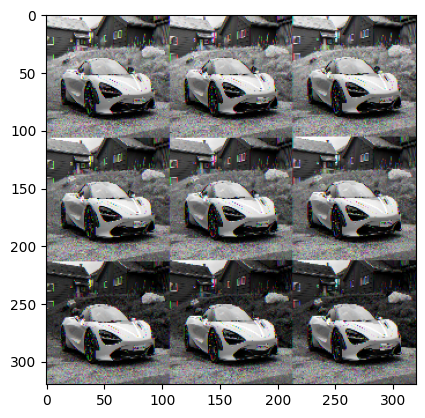

In [64]:
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [65]:
yolo.setInput(blob)


In [66]:
output_layers_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layers_name)

In [67]:
height,width,_ =img.shape

In [68]:
boxes = []
confidences = []
class_ids = []
for output in layeroutput :
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0]*width)
      center_y = int(detection[0]*height)
      w = int(detection[0]*width)
      h = int(detection[0]*height)

      x = int(center_x- w/2)
      y = int(center_y- h/2)

      boxes.append([x,y,w,h])
      confidences.append((float(confidence)))
      class_ids.append(class_id)


In [69]:
len(boxes)

1

In [70]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [71]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size = (len(boxes), 3))

In [72]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]
  label = str(classes[class_ids[i]])
  confidence = str(round(confidences[i], 2))
  color = colors[i]

  cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
  cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (255,255,255), 2)

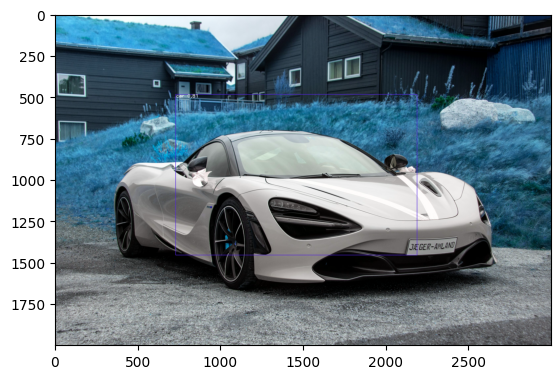

In [73]:
plt.imshow(img)

In [74]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

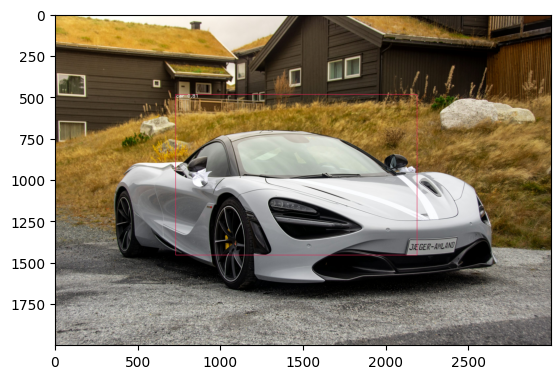

In [75]:
plt.imshow(img)

In [76]:
cv2.imwrite("./img.jpg", img)

True